# FSROOT Introductory Tutorial

`FSROOT` is an alternative way to process `ROOT` data. It is a `c++` library that is also python bound into the `PyAmpTools` package. This example is a work in progress but it shows a minimal example (thanks to Daniel Barton) of how to make a simple histogram. As I do not personally use `FSROOT` I cannot guarantee all functionality is python bound but in principle (most?) of it should be and is avaible in the global namespace after running `atiSetup.setup(globals(), use_fsroot=True)`.

In [1]:
import ROOT
from pyamptools import atiSetup
import os
from IPython.display import Image

Welcome to JupyROOT 6.28/06


As always we need to load the environment. Since we are using `FSROOT`, we need to set `use_fsroot=True`

In [2]:
PYAMPTOOLS_HOME = os.environ['PYAMPTOOLS_HOME']
atiSetup.setup(globals(), use_fsroot=True)

atiSetup| node called python

------------------------------------------------
atiSetup| MPI is disabled
atiSetup| GPU is disabled
------------------------------------------------


atiSetup| Loading library libIUAmpTools.so ............  ON
atiSetup| Loading library libAmpTools.so ..............  ON
atiSetup| Loading library libAmpPlotter.so ............  ON
atiSetup| Loading library libAmpsDataIO.so ............  ON
atiSetup| Loading library libFSRoot.so ................  ON
atiSetup| Loading library libAmpsGen.so ...............  OFF


------------------------------------------------
------------------------------------------------

atiSetup| minor warning: Unable to alias FSFitFunctions - doesn't exist under ROOT namespace
atiSetup| minor warning: Unable to alias FSFitPrivate - doesn't exist under ROOT namespace
atiSetup| minor warning: Unable to alias omegapiAngles - doesn't exist under ROOT namespace
atiSetup| minor warning: Unable to alias URtypes - doesn't exist under ROOT name

(False, False, 0)

We will reuse the test sample (fake data) and plot the real part of some amplitude since this the only dataset available as part of this package

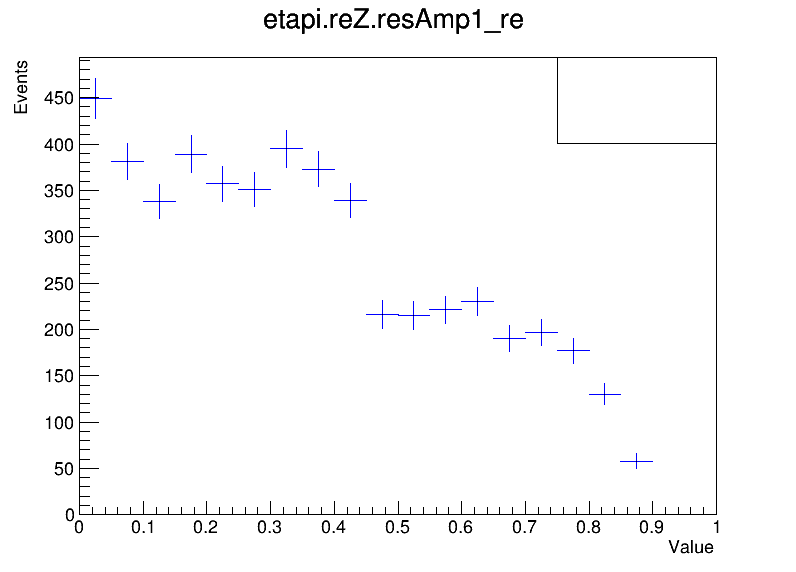

    CREATING HISTOGRAM... FSRootHist:000001   OKAY           (entries = 10000)


Info in <TCanvas::Print>: png file test_etapi_reZ_resAmp1_re.png has been created


In [3]:
### Location of the data
fileName = f"{PYAMPTOOLS_HOME}/tests/samples/SIMPLE_EXAMPLE/samples/data_generated_samples_amps.root"
treeName = 'kin'
variable = "etapi.reZ.resAmp1_re" # the "Branch" name in the ROOT tree

### Plotting
plotTitle = 'Real[Amplitude]'
axisLabel = 'Value'

canvas = ROOT.TCanvas('canvas', 'canvas', 800, 600)
    
h1 = FSHistogram.getTH1F(fileName, treeName, variable, "(20, 0.0, 1.0)", "")
h1.SetStats(False)
h1.SetLineColor(ROOT.kBlue)
h1.GetXaxis().SetTitle(axisLabel)
h1.GetYaxis().SetTitle('Events')
h1.Draw()
    
legend1 = ROOT.TLegend(0.7, 0.9, 0.9, 0.75)
legend1.Draw('same')

img_path = 'test_etapi_reZ_resAmp1_re.png'
canvas.SaveAs(img_path)
canvas.Close()
display(Image(filename=img_path))

# clean up
os.remove(img_path)